# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

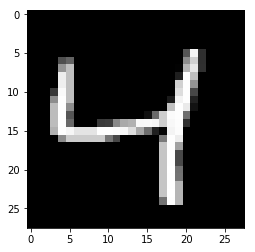

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6948
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6881
Epoch: 1/20... Training loss: 0.6846
Epoch: 1/20... Training loss: 0.6803
Epoch: 1/20... Training loss: 0.6750
Epoch: 1/20... Training loss: 0.6684
Epoch: 1/20... Training loss: 0.6606
Epoch: 1/20... Training loss: 0.6518
Epoch: 1/20... Training loss: 0.6420
Epoch: 1/20... Training loss: 0.6306
Epoch: 1/20... Training loss: 0.6163
Epoch: 1/20... Training loss: 0.6019
Epoch: 1/20... Training loss: 0.5879
Epoch: 1/20... Training loss: 0.5681
Epoch: 1/20... Training loss: 0.5534
Epoch: 1/20... Training loss: 0.5348
Epoch: 1/20... Training loss: 0.5185
Epoch: 1/20... Training loss: 0.4978
Epoch: 1/20... Training loss: 0.4839
Epoch: 1/20... Training loss: 0.4601
Epoch: 1/20... Training loss: 0.4455
Epoch: 1/20... Training loss: 0.4275
Epoch: 1/20... Training loss: 0.4172
Epoch: 1/20... Training loss: 0.4004
Epoch: 1/20... Training loss: 0.3881
Epoch: 1/20... Training loss: 0.3721
E

Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1828
Epoch: 1/20... Training loss: 0.1796
Epoch: 1/20... Training loss: 0.1875
E

Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1505
E

Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1253
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1343
E

Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1174
E

Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1130
E

Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1061
E

Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1012
E

Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0975
E

Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0972
E

Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.1020
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0960
E

Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0994
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0898
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.1000
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0883
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

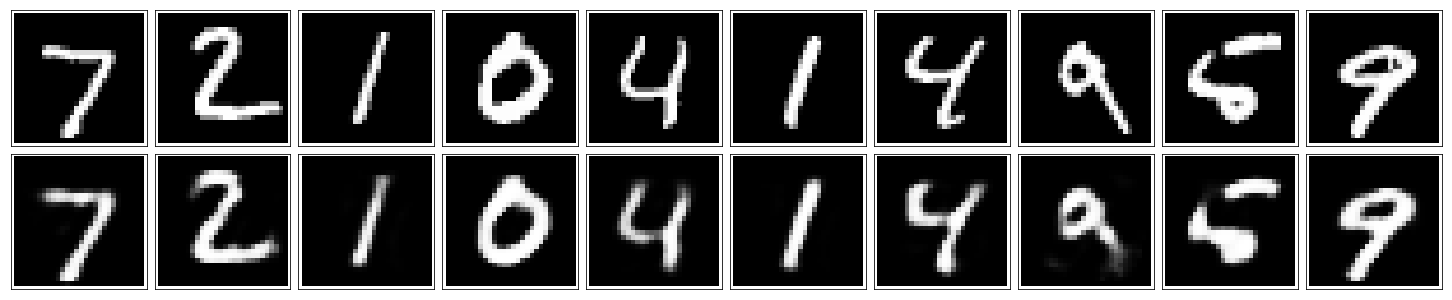

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.